In [2]:
import subprocess
import sys
# a function to install packages 
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_package('joblib')
import joblib  # Try importing again after installing


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [32]:

# Importing needed libraries
from joblib import dump
from joblib import  load
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


In [12]:
# we read and we remove the index column in the data
df_main=pd.read_csv("DataSets/cicddos2019_dataset.csv", usecols=lambda column: column not in ['Unnamed: 0'])
# Drop the "Label" column which is the type of attack
df_main.drop(['Label'], axis=1, inplace=True)
# for faster detection
df = df_main.sample(n=100000, random_state=0) 
#df = df.head(20000)
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
15124,6,100544,1,1,6.0,6.0,6.0,6.0,6.00,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
414355,17,884,50,0,21568.0,0.0,440.0,224.0,431.36,42.756912,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
232748,17,20893,2,2,64.0,256.0,32.0,32.0,32.00,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
349710,17,104,6,0,2640.0,0.0,440.0,440.0,440.00,0.000000,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
201509,17,3001061,4,0,2064.0,0.0,516.0,516.0,516.00,0.000000,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [6]:
#checking if there is null values
df.isnull().sum()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Class                       0
Length: 78, dtype: int64

In [7]:
#checking if there is duplicated values
df.duplicated().sum()


909

In [13]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)
# Display the number of duplicate rows after removal
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


In [9]:
#checking if the data is balanced according to Protocols used
print (sorted(Counter(df['Protocol']).items()))

[(0, 389), (6, 26861), (17, 71841)]


In [15]:
X1=df
Y=df['Protocol']
X= X1.drop(['Protocol'], axis=1)
#balancing using oversampling
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,Y)
print (sorted(Counter(y_resampled).items()),y_resampled.shape)

## balancing using SMOTE
## Let's assume 'categorical_feature1' and 'categorical_feature2' are your categorical features.
#label_enc_1 = LabelEncoder()
#label_enc_2 = LabelEncoder()
#X['Label'] = label_enc_1.fit_transform(X['Label'])
#X['Class'] = label_enc_2.fit_transform(X['Class'])

## Specify which columns are categorical (after encoding). Assume they are the first two columns.
#categorical_features_indices = [X.columns.tolist().index('Class'),
#                                X.columns.tolist().index('Class')]

#smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
#X2_resampled, y2_resampled = smote_nc.fit_resample(X, Y)

#print("The result of SMOTE method:")
#print(sorted(Counter(y_resampled).items()), y_resampled.shape)


[(0, 71841), (6, 71841), (17, 71841)] (215523,)


In [16]:

## No resampling for fast analysis
#X_resampled = X
#y_resamples = Y
##rearranging data from oversampling
bf=X_resampled
bf.insert(0, "Protocol", y_resampled)
##rearranging data from SMOTE
#bf=X2_resampled
#bf.insert(0, "Protocol", y2_resampled)

#new balanced data
bf.head()



,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,6,100544,1,1,6.0,6.0,6.0,6.0,6.00,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,17,884,50,0,21568.0,0.0,440.0,224.0,431.36,42.756912,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
2,17,20893,2,2,64.0,256.0,32.0,32.0,32.00,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,17,104,6,0,2640.0,0.0,440.0,440.0,440.00,0.000000,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
4,17,3001061,4,0,2064.0,0.0,516.0,516.0,516.00,0.000000,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [17]:
# Create separate label encoders for each column
label_encoder_class = LabelEncoder()

# Apply the label encoders to the respective columns
bf["Class"] = label_encoder_class.fit_transform(bf["Class"])

# Display the first few rows of the dataframe
bf.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,6,100544,1,1,6.0,6.0,6.0,6.0,6.00,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17,884,50,0,21568.0,0.0,440.0,224.0,431.36,42.756912,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,17,20893,2,2,64.0,256.0,32.0,32.0,32.00,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17,104,6,0,2640.0,0.0,440.0,440.0,440.00,0.000000,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,17,3001061,4,0,2064.0,0.0,516.0,516.0,516.00,0.000000,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
d=scaler.fit_transform(bf)
d=pd.DataFrame(d,columns=list(bf.columns))

In [19]:
target_name='Class'       #feature matrix
y=d[target_name]
x=d.drop([target_name],axis=1)
x.shape

(215523, 77)

In [20]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Note: corrected condition
                colname = corr_matrix.columns[i]  # Name of the correlated column
                col_corr.add(colname)
    return col_corr

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Identify the correlated features
ncorr_features = correlation(X_train, 0.8)

# Drop the correlated features
x_train = X_train.drop(ncorr_features, axis=1)
x_test = X_test.drop(ncorr_features, axis=1)

In [21]:

# Feature Selection using Extra Trees Classifier for importance
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train, y_train)
importances = etc.feature_importances_
print(x_train.shape[1])


45


In [22]:
#n_features = x_train.shape[1] # Number of features that we like to select
n_features = 15
indices = np.argsort(importances)[::-1][:n_features]
print(x_train.columns[indices])
X_train_selected = x_train.iloc[:, indices]
X_test_selected = x_test.iloc[:, indices]


Index(['Protocol', 'ACK Flag Count', 'Fwd Packet Length Min', 'Flow Duration',
       'Fwd Packet Length Max', 'URG Flag Count', 'Down/Up Ratio',
       'Bwd Packet Length Min', 'Init Fwd Win Bytes', 'Bwd Packet Length Max',
       'CWE Flag Count', 'Init Bwd Win Bytes', 'Fwd Packet Length Std',
       'Flow IAT Mean', 'Fwd Packets Length Total'],
      dtype='object')


In [23]:
# print top 15 important features
top_15_indices = np.argsort(importances)[::-1][:15]
top_15_features = x_train.columns[top_15_indices]
print("Top 15 Important Features:")
print(top_15_features)

Top 15 Important Features:
Index(['Protocol', 'ACK Flag Count', 'Fwd Packet Length Min', 'Flow Duration',
       'Fwd Packet Length Max', 'URG Flag Count', 'Down/Up Ratio',
       'Bwd Packet Length Min', 'Init Fwd Win Bytes', 'Bwd Packet Length Max',
       'CWE Flag Count', 'Init Bwd Win Bytes', 'Fwd Packet Length Std',
       'Flow IAT Mean', 'Fwd Packets Length Total'],
      dtype='object')


In [24]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_selected, y_train)


LogisticRegression(max_iter=1000)

In [25]:
y_pred=logreg_model.predict(X_test_selected)
#print model performance
print(accuracy_score(y_test,y_pred))

0.9833892695299813


In [26]:

# Instantiate SVM classifier
#fit model
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train_selected,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [33]:
# save classifier
dump(classifier, 'svm_model_DDOS2019.joblib')

['svm_model_DDOS2019.joblib']

In [35]:
# load the saved classifier
classifier_load = load('svm_model_DDOS2019.joblib')
#print model performances
y_predict=classifier_load.predict(X_test_selected)
print(accuracy_score(y_test,y_predict))

0.9868073062468101


In [29]:
class_counts = pd.Series(y_test).value_counts()
print(class_counts)

Class
1.0    34659
0.0    29998
Name: count, dtype: int64


In [30]:
conf_matrix = confusion_matrix(y_test, y_predict)
precision, recall, _ = precision_recall_curve(y_test, classifier.decision_function(X_test_selected))
fpr, tpr, _ = roc_curve(y_test, classifier.decision_function(X_test_selected))
roc_auc = auc(fpr, tpr)

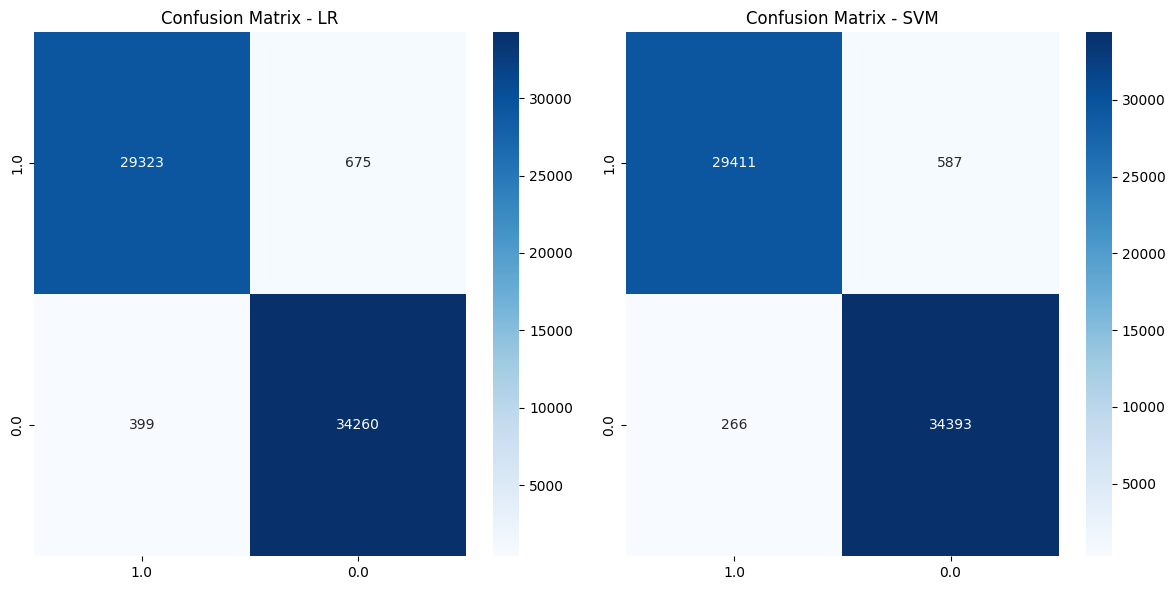

In [31]:

# SVM Confusion Matrix
plt.figure(figsize=(12, 6))

# Linear Regression Confusion Matrix
plt.subplot(1, 2, 1)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix - LR')

# SVM Confusion Matrix
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_counts.index, yticklabels=class_counts.index)
plt.title('Confusion Matrix - SVM')

# Adjust layout for better aesthetics
plt.tight_layout()

# Display the figure
plt.show()
